## Transfer Learning Inception V3 using Keras

In [15]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/COVID_DATASET'
valid_path = '/content/drive/MyDrive/COVID_DATASET'


In [18]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [19]:
# Not training existing weights
for layer in inception.layers:
    layer.trainable = False

In [20]:
  # Fetch the numner of output classes
folders = glob('/content/drive/MyDrive/COVID_DATASET/*')

In [21]:
#Layers
x = Flatten()(inception.output)

In [22]:
prediction = Dense(len(folders), activation='softmax')(x)

# Model
model = Model(inputs=inception.input, outputs=prediction)

In [23]:

# Model Summary
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [24]:
# Model Compile with Adam optimizer
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [25]:
# Reading and Processing Images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,validation_split=0.25)

test_datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.25)

In [26]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/COVID_DATASET',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 746 images belonging to 2 classes.


In [27]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/COVID_DATASET',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 746 images belonging to 2 classes.


In [28]:
# Model Training
target = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
24/24 [==============================] - 183s 8s/step - loss: 4.2933 - accuracy: 0.5804 - val_loss: 1.8074 - val_accuracy: 0.6823
Epoch 2/10
24/24 [==============================] - 175s 7s/step - loss: 1.2174 - accuracy: 0.7373 - val_loss: 0.7398 - val_accuracy: 0.8150
Epoch 3/10
24/24 [==============================] - 175s 7s/step - loss: 0.7714 - accuracy: 0.7962 - val_loss: 0.4180 - val_accuracy: 0.8485
Epoch 4/10
24/24 [==============================] - 176s 7s/step - loss: 0.8275 - accuracy: 0.7936 - val_loss: 0.3562 - val_accuracy: 0.8579
Epoch 5/10
24/24 [==============================] - 177s 8s/step - loss: 0.5464 - accuracy: 0.8525 - val_loss: 0.2584 - val_accuracy: 0.9075
Epoch 6/10
24/24 [==============================] - 172s 7s/step - loss: 0.4473 - accuracy: 0.8525 - val_loss: 0.2090 - val_accuracy: 0.9316
Epoch 7/10
24/24 [==============================] - 169s 7s/step - loss: 0.3555 - accuracy: 0.8901 - val_loss: 0.2062 - val_accuracy: 0.9142
Epoch 8/10
24

In [29]:
import matplotlib.pyplot as plt

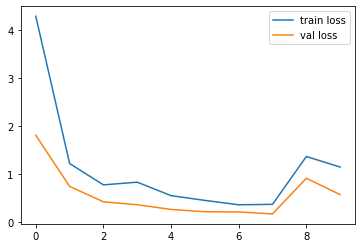

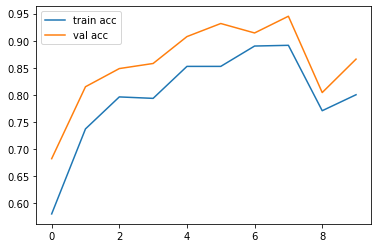

<Figure size 432x288 with 0 Axes>

In [30]:
# plot the loss
plt.plot(target.history['loss'], label='train loss')
plt.plot(target.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(target.history['accuracy'], label='train acc')
plt.plot(target.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [31]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [32]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [37]:
model=load_model('model_inception.h5')

In [38]:
#Validating an image
img=image.load_img('/content/drive/MyDrive/COVID_DATASET/CT_NonCOVID/0.jpg',target_size=(224,224))



In [39]:
x=image.img_to_array(img)
x

array([[[42., 42., 42.],
        [41., 41., 41.],
        [42., 42., 42.],
        ...,
        [43., 43., 43.],
        [43., 43., 43.],
        [43., 43., 43.]],

       [[42., 42., 42.],
        [41., 41., 41.],
        [42., 42., 42.],
        ...,
        [41., 41., 41.],
        [41., 41., 41.],
        [40., 40., 40.]],

       [[42., 42., 42.],
        [41., 41., 41.],
        [42., 42., 42.],
        ...,
        [41., 41., 41.],
        [40., 40., 40.],
        [39., 39., 39.]],

       ...,

       [[45., 45., 45.],
        [51., 51., 51.],
        [55., 55., 55.],
        ...,
        [35., 35., 35.],
        [33., 33., 33.],
        [37., 37., 37.]],

       [[54., 54., 54.],
        [51., 51., 51.],
        [49., 49., 49.],
        ...,
        [35., 35., 35.],
        [37., 37., 37.],
        [35., 35., 35.]],

       [[44., 44., 44.],
        [50., 50., 50.],
        [47., 47., 47.],
        ...,
        [35., 35., 35.],
        [40., 40., 40.],
        [35., 35., 35.]]

In [40]:
x.shape

(224, 224, 3)

In [41]:
x=x/255

In [42]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [43]:
model.predict(img_data)

array([[0.31669846, 0.6833015 ]], dtype=float32)

In [44]:
a=np.argmax(model.predict(img_data), axis=1)

In [45]:
a==1

array([ True])